In [1]:
#!pip install --user -U pip

In [2]:
#!pip install --user umap-learn

In [3]:
#!pip install --user -U seaborn

In [105]:
#!pip install --user biopython

In [1]:
from Bio import SeqIO
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from umap import UMAP

In [2]:
embedding_pos = np.load("example_embedding_1M_pos.1M.npy")
embedding_pos.shape

(1000000, 512)

In [3]:
embedding_neg = np.load("example_embedding_1M_neg.1M.npy")
embedding_neg.shape

(1000000, 512)

In [4]:
embedding = np.stack((embedding_pos, embedding_neg[::-1])).mean(axis=0)
embedding.shape

(1000000, 512)

In [87]:
N_PCS = 40
latent = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=N_PCS))
]).fit_transform(embedding)
latent.shape

(1000000, 40)

In [406]:
window_size = 1000000
center = 3566700

# TODO: find an enhancer example

# TODO: find tranposon example

# would be nice to find an example of a certain protein domain or something interesting about a protein

def plot_latent(latent, start, end, n_components=N_PCS):
    latent_zoom = latent[window_size//2+start-center:window_size//2+end-center, :n_components]
    print(latent_zoom.shape)
    if latent_zoom.shape[1] == 512:  # redo PCA
        print("Running PCA on zoomed-in window")
        latent_zoom = latent = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=40))]).fit_transform(latent_zoom)
        print(latent_zoom.shape)
    
    df2 = pd.DataFrame(data=latent_zoom.T)
    df2.index += 1
    df2.index = "PC" + df2.index.astype(str)
    #plt.figure(figsize=(15, 15))
    #plt.figure(figsize=(15, 5))
    plt.figure(figsize=(15, 3))
    sns.heatmap(
        data=df2,
        cmap="bwr",
        center=0,
        square=False,
        yticklabels=1,
        #cbar=False,
    )
    #plt.xlabel("pos")
    plt.xticks([], [])
    plt.yticks(rotation = 0)
    #plt.yticks([], [])
    plt.ylabel("Embedding principal component");
    return df2

(1000, 10)


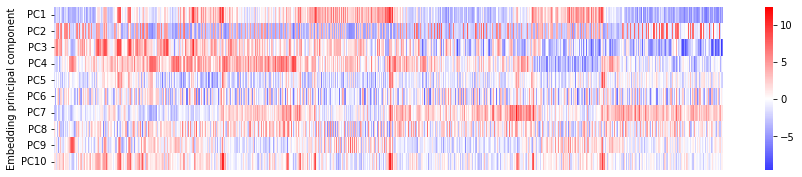

In [425]:
df2 = plot_latent(latent, 3567000, 3568000, n_components=10)
#plt.savefig("pca_viz_2.svg", bbox_inches="tight")

In [426]:
df2 = df2.T
df2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.573791,6.009903,1.441510,-0.906119,-3.365928,3.567182,-2.512040,-0.237265,-0.271341,0.865339
1,-3.554206,-1.750381,2.430971,-1.268034,-1.694460,0.370800,-2.963300,1.831575,-1.376737,1.352829
2,-3.242969,-1.169406,3.520899,-1.738497,-0.236123,-4.220421,-3.250630,-0.614544,-0.801978,1.499428
3,-1.077950,5.421076,4.406274,-1.443819,0.809997,-2.987339,-2.054230,-1.269703,-1.316379,-0.277377
4,-1.324801,4.777307,6.294000,-2.482119,-1.639841,-0.116738,-2.346587,0.072367,1.658515,-1.589739
...,...,...,...,...,...,...,...,...,...,...
995,-5.480726,-2.167558,-1.815990,-3.627140,-0.196936,0.077553,4.722043,-2.853843,2.120757,-1.436947
996,-4.714771,-0.917495,-5.397172,-1.669405,-0.071750,-0.053818,3.285444,-0.065674,-0.705663,2.568826
997,-3.540311,-0.001926,-9.542922,-1.158599,-2.018139,0.994767,1.286348,1.570420,-0.804793,0.747773
998,-4.774550,0.071391,-6.643457,0.226245,-2.393637,-0.409279,1.410330,-0.260228,0.863848,0.643992


In [434]:
df2["nucleotide"] = list(str(genome["Chr5"][3567000:3568000].seq))
df2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,nucleotide
0,-0.573791,6.009903,1.441510,-0.906119,-3.365928,3.567182,-2.512040,-0.237265,-0.271341,0.865339,G
1,-3.554206,-1.750381,2.430971,-1.268034,-1.694460,0.370800,-2.963300,1.831575,-1.376737,1.352829,A
2,-3.242969,-1.169406,3.520899,-1.738497,-0.236123,-4.220421,-3.250630,-0.614544,-0.801978,1.499428,A
3,-1.077950,5.421076,4.406274,-1.443819,0.809997,-2.987339,-2.054230,-1.269703,-1.316379,-0.277377,C
4,-1.324801,4.777307,6.294000,-2.482119,-1.639841,-0.116738,-2.346587,0.072367,1.658515,-1.589739,C
...,...,...,...,...,...,...,...,...,...,...,...
995,-5.480726,-2.167558,-1.815990,-3.627140,-0.196936,0.077553,4.722043,-2.853843,2.120757,-1.436947,T
996,-4.714771,-0.917495,-5.397172,-1.669405,-0.071750,-0.053818,3.285444,-0.065674,-0.705663,2.568826,T
997,-3.540311,-0.001926,-9.542922,-1.158599,-2.018139,0.994767,1.286348,1.570420,-0.804793,0.747773,T
998,-4.774550,0.071391,-6.643457,0.226245,-2.393637,-0.409279,1.410330,-0.260228,0.863848,0.643992,A


<AxesSubplot:xlabel='nucleotide', ylabel='PC2'>

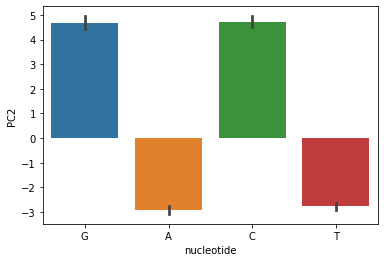

In [435]:
sns.barplot(data=df2, x="nucleotide", y="PC2")

<AxesSubplot:xlabel='nucleotide', ylabel='PC3'>

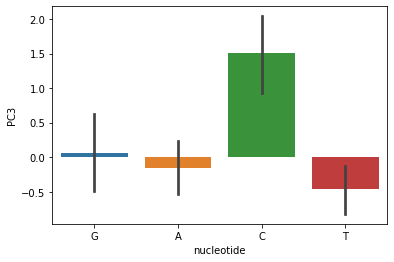

In [437]:
sns.barplot(data=df2, x="nucleotide", y="PC3")

<AxesSubplot:xlabel='nucleotide', ylabel='PC4'>

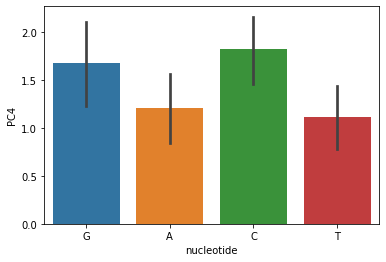

In [438]:
sns.barplot(data=df2, x="nucleotide", y="PC4")

In [ ]:
plt.hist()

In [90]:
def plot_latent_line(latent, start, end, n_components=N_PCS):
    latent_zoom = latent[window_size//2+start-center:window_size//2+end-center, :n_components]
    print(latent_zoom.shape)
    if latent_zoom.shape[1] == 512:  # redo PCA
        print("Running PCA on zoomed-in window")
        latent_zoom = latent = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=40))]).fit_transform(latent_zoom)
        print(latent_zoom.shape)
    
    df2 = pd.DataFrame(data=latent_zoom)
    df2.columns = "PC" + df2.columns.astype(str)
    df2["pos"] = df2.index
    df2 = pd.wide_to_long(df2, ["PC"], "pos", "pc_index").reset_index()
    df2.pc_index += 1
    
    plt.figure(figsize=(20, 5))
    #sns.heatmap(
    #    data=df2,
    #    cmap="bwr",
    #    center=0,
    #    square=False,
    #    yticklabels=1,
    #    cbar=False,
    #)
    
    g = sns.relplot(
        data=df2,
        x="pos",
        y="PC",
        row="pc_index",
        height=1,
        aspect=10,
        kind="line",
        facet_kws=dict(margin_titles=True),
    )
    g.set_titles(row_template="PC{row_name}")
    g.set(xticks=[], xlabel="")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)
    g.figure.subplots_adjust(hspace=0)
    
    #plt.xlabel("pos")
    #plt.xticks([], [])
    #plt.yticks([], [])
    #plt.ylabel("embedding principal component");

(1000, 10)


<Figure size 1440x360 with 0 Axes>

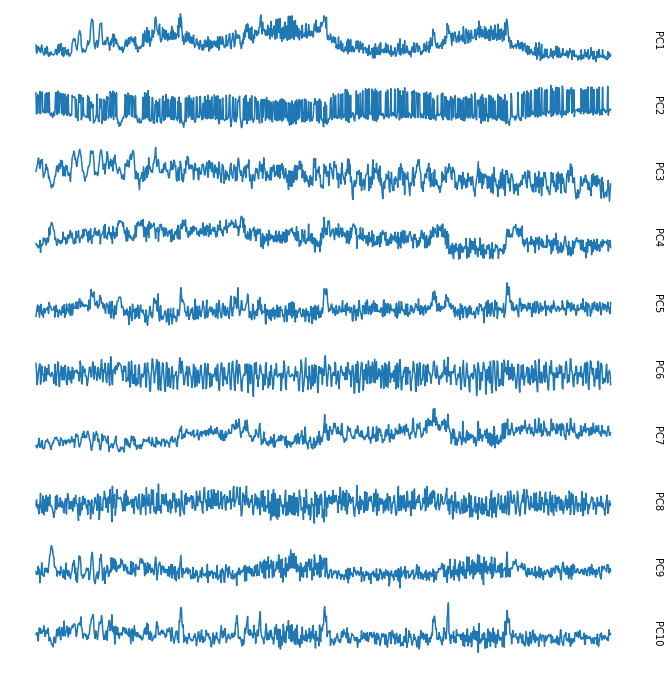

In [84]:
plot_latent_line(latent, 3567000, 3568000, n_components=10)

## Promoter, exons
TODO: find better example without something weird on the far left

http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3566700%2D3567700&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(1000, 40)


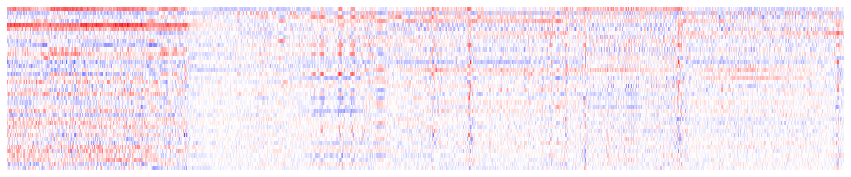

In [8]:
plot_latent(latent, 3566700, 3567700)

(1000, 512)
Running PCA on zoomed-in window
(1000, 40)


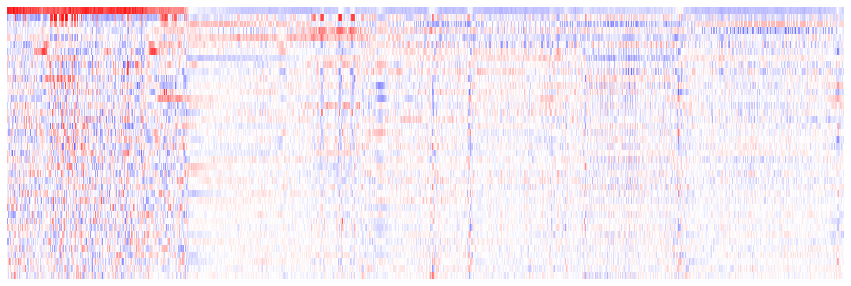

In [11]:
plot_latent(embedding, 3566700, 3567700)

# Example TFBS from FunTFBS
http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3561938%2D3562102&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(164, 40)


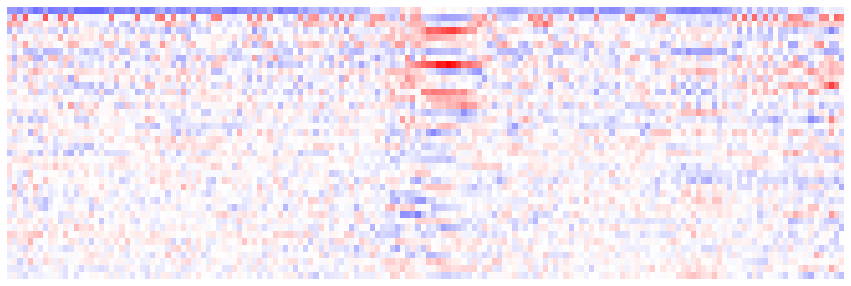

In [12]:
plot_latent(latent, 3561938, 3562102)

(164, 512)
Running PCA on zoomed-in window
(164, 40)


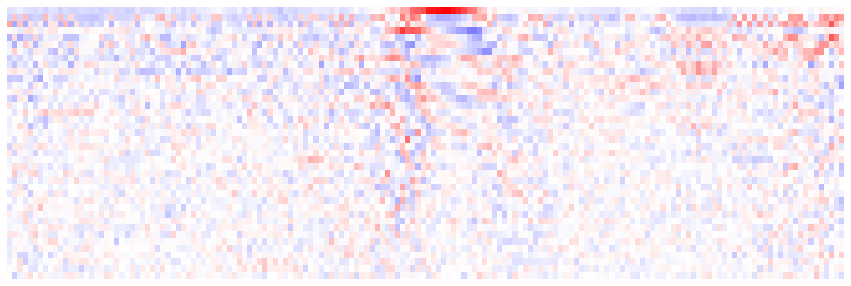

In [13]:
plot_latent(embedding, 3561938, 3562102)

## Start codon
http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3567354%2D3567402&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(49, 40)


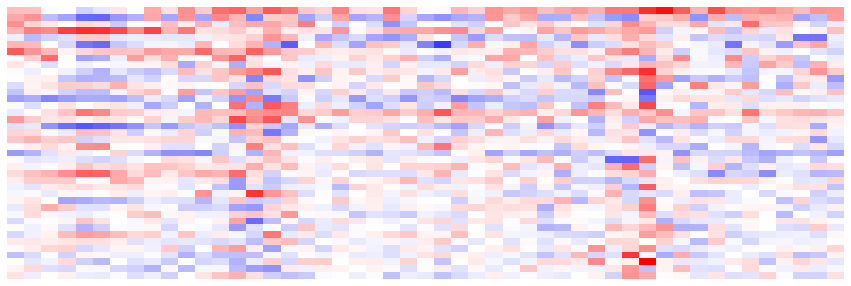

In [14]:
plot_latent(latent, 3567353, 3567402)

(49, 512)
Running PCA on zoomed-in window
(49, 40)


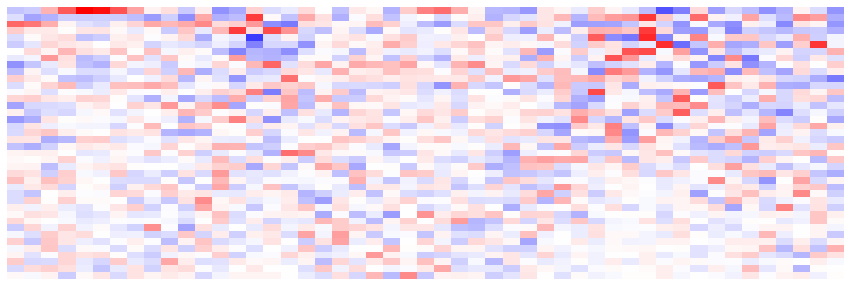

In [15]:
plot_latent(embedding, 3567353, 3567402)

## Alternative splicing
http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3568832%2D3569781&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(950, 40)


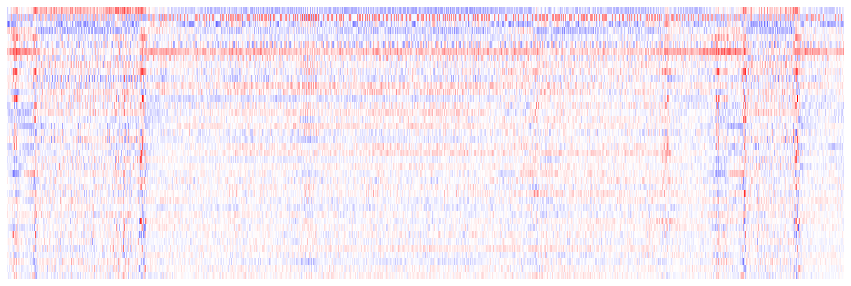

In [16]:
plot_latent(latent, 3568831, 3569781)

(950, 512)
Running PCA on zoomed-in window
(950, 40)


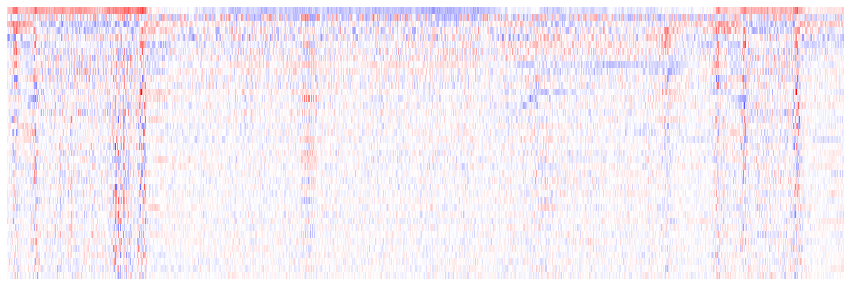

In [17]:
plot_latent(embedding, 3568831, 3569781)

## Gene on the negative strand. there's another thing interesting here, to inspect
http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3557971%2D3558946&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(976, 40)


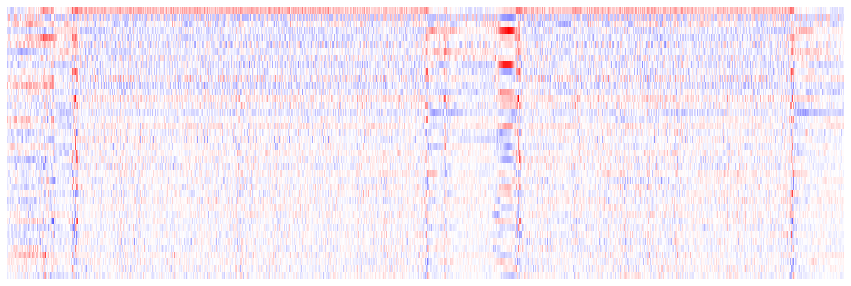

In [18]:
plot_latent(latent, 3557970, 3558946)

(976, 512)
Running PCA on zoomed-in window
(976, 40)


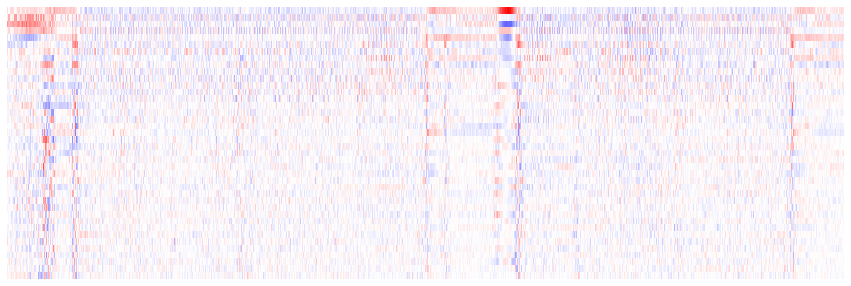

In [19]:
plot_latent(embedding, 3557970, 3558946)

In [20]:
"""
for pc in range(1, 21):
    df_bedgraph = pd.DataFrame({
        "chromosome": ["chr5" for _ in range(len(latent_zoom))],
        "start": np.arange(start, end),
        "end": np.arange(start+1, end+1),
        "values": latent_zoom[:, pc-1],
    })
    print(df_bedgraph)

    with open(f'example_bedgraph_PC{pc}.txt', 'a') as file:
        file.write(f'track type=bedGraph name="PC{pc}" description="PC{pc}" visibility=full color=255,0,0 altColor=0,0,255 maxHeightPixels=32\n')
        df_bedgraph.to_csv(file, sep="\t", header=False, index=False)
"""

'\nfor pc in range(1, 21):\n    df_bedgraph = pd.DataFrame({\n        "chromosome": ["chr5" for _ in range(len(latent_zoom))],\n        "start": np.arange(start, end),\n        "end": np.arange(start+1, end+1),\n        "values": latent_zoom[:, pc-1],\n    })\n    print(df_bedgraph)\n\n    with open(f\'example_bedgraph_PC{pc}.txt\', \'a\') as file:\n        file.write(f\'track type=bedGraph name="PC{pc}" description="PC{pc}" visibility=full color=255,0,0 altColor=0,0,255 maxHeightPixels=32\n\')\n        df_bedgraph.to_csv(file, sep="\t", header=False, index=False)\n'

In [309]:
gtf = pd.read_csv(
    "../../data/vep/tair10.gff", sep='\t', header=None, comment="#",
    names=['chromosome', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute'],
)
gtf = gtf[gtf.chromosome=="Chr5"]
gtf.shape

(135017, 9)

In [310]:
# very careful with this, when defining overlaps
#gtf = gtf[gtf.strand=="+"]
#gtf.shape

In [311]:
# To work with the already computed 1Mb embeddings
gtf = gtf[(gtf.start > center-window_size//2) & (gtf.end < center+window_size//2)]
gtf.start -= (center-window_size//2)
gtf.end -= (center-window_size//2)
gtf.shape

(6455, 9)

In [312]:
# Experimental: shrink features to avoid sampling a position
# at the edge between and exon and intron, where local averaging
# might go wrong
edge = 20
gtf.start += edge
gtf.end -= edge

In [313]:
gtf.feature.value_counts()

exon                         2417
CDS                          2287
protein                       369
mRNA                          367
five_prime_UTR                365
three_prime_UTR               337
gene                          291
tRNA                            7
transposable_element_gene       3
mRNA_TE_gene                    3
ncRNA                           2
miRNA                           2
pseudogenic_exon                2
snoRNA                          1
pseudogene                      1
pseudogenic_transcript          1
Name: feature, dtype: int64

In [314]:
gtf = gtf[gtf.feature != "protein"]  # redundant
gtf = gtf[gtf.feature != "gene"]  # redundant
gtf.shape

(5795, 9)

In [315]:
#gtf.head(100).tail(50)

In [316]:
#df['gene_id'] = df.attribute.str.extract(r'gene_id "([^;]*)";')
#df['transcript_id'] = df.attribute.str.extract(r'transcript_id "([^;]*)"')  # the filtered versions need this
#df['transcript_id'] = df.attribute.str.extract(r'transcript_id "([^;]*)";')

In [317]:
overlaps = pd.Series(["Intergenic"] * window_size)
i = -1
for row_index, row in gtf.iterrows():
    i += 1
    if i % 1000 == 0: print(i)
    if row.end > row.start:
        overlaps[row.start:row.end] += "," + row.feature
overlaps = overlaps.str.split(",").apply(Counter)

0
1000
2000
3000
4000
5000


In [318]:
overlaps.value_counts()

TypeError: unhashable type: 'Counter'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'Counter'


{'Intergenic': 1}                                                339716
{'Intergenic': 1, 'mRNA': 1, 'exon': 1, 'CDS': 1}                219128
{'Intergenic': 1, 'mRNA': 1}                                     184259
{'Intergenic': 1, 'mRNA': 2}                                      59811
{'Intergenic': 1, 'mRNA': 2, 'CDS': 2, 'exon': 2}                 40261
                                                                  ...  
{'Intergenic': 1, 'mRNA': 4, 'exon': 3, 'three_prime_UTR': 2}         6
{'Intergenic': 1, 'mRNA': 4, 'three_prime_UTR': 2, 'exon': 2}         3
{'Intergenic': 1, 'exon': 1, 'CDS': 1}                                3
{'Intergenic': 1, 'mRNA': 4, 'CDS': 2, 'exon': 2}                     3
{'Intergenic': 1, 'mRNA': 4, 'CDS': 3, 'exon': 3}                     1
Length: 84, dtype: int64

In [319]:
overlaps.value_counts()[:20]

TypeError: unhashable type: 'Counter'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'Counter'


{'Intergenic': 1}                                                                  339716
{'Intergenic': 1, 'mRNA': 1, 'exon': 1, 'CDS': 1}                                  219128
{'Intergenic': 1, 'mRNA': 1}                                                       184259
{'Intergenic': 1, 'mRNA': 2}                                                        59811
{'Intergenic': 1, 'mRNA': 2, 'CDS': 2, 'exon': 2}                                   40261
{'Intergenic': 1, 'mRNA': 1, 'exon': 1, 'three_prime_UTR': 1}                       33764
{'Intergenic': 1, 'mRNA': 3}                                                        28506
{'Intergenic': 1, 'mRNA': 3, 'CDS': 3, 'exon': 3}                                   15122
{'Intergenic': 1, 'mRNA': 1, 'five_prime_UTR': 1, 'exon': 1}                        13326
{'Intergenic': 1, 'mRNA': 1, 'exon': 1}                                             12512
{'Intergenic': 1, 'mRNA': 4}                                                         8374
{'Intergen

In [336]:
segmentation = pd.Series([""] * window_size)
segmentation[overlaps==Counter(Intergenic=1)] = "Intergenic"
segmentation[overlaps==Counter(Intergenic=1, mRNA=1)] = "Intron"  # technically should include all mRNA>=1
segmentation[overlaps==Counter(Intergenic=1, mRNA=1, exon=1, CDS=1)] = "CDS"
segmentation[overlaps==Counter(Intergenic=1, mRNA=1, exon=1, five_prime_UTR=1)] = "5' UTR"
segmentation[overlaps==Counter(Intergenic=1, mRNA=1, exon=1, three_prime_UTR=1)] = "3' UTR"
# can comment this one out, not sure it's working
#segmentation[overlaps==Counter(Intergenic=1, mRNA=2, exon=1, CDS=1)] = "alt_spliced_cds"  # again, could do mRNA>=1, etc.
#segmentation[overlaps==Counter(Intergenic=1, ncRNA=2)] = "ncRNA"
segmentation.value_counts()

Intergenic    339716
CDS           219128
              209807
Intron        184259
3' UTR         33764
5' UTR         13326
dtype: int64

In [337]:
segmentation = segmentation[segmentation!=""]
border = 10000
segmentation = segmentation[border:-border]

In [378]:
segmentation_subset = segmentation.groupby(segmentation).sample(n=1000, random_state=42).to_frame().rename(columns={0: "Region"})
segmentation_subset = segmentation_subset.sample(frac=1, random_state=42)  # just shuffle
segmentation_subset

,Region
694653,5' UTR
661591,CDS
239664,CDS
538531,5' UTR
64803,3' UTR
...,...
144088,Intron
580398,3' UTR
183928,Intergenic
777609,Intergenic


In [379]:
genome = SeqIO.to_dict(SeqIO.parse("../../data/mlm/tair10.fa", "fasta"))
segmentation_subset["nucleotide"] = segmentation_subset.apply(lambda row: genome["Chr5"][row.name + center-window_size//2], axis=1)
# here can add more nucleotides
segmentation_subset["nucleotide_window"] = segmentation_subset.apply(
    lambda row: str(genome["Chr5"][row.name + center-window_size//2 - n_aggregation//2:row.name + center-window_size//2 + 1 + n_aggregation//2].seq),
    axis=1
)
segmentation_subset

,Region,nucleotide,nucleotide_window
694653,5' UTR,G,GTCCAAATTAGGAGGAGCGAGAGCGAAGGTACG
661591,CDS,T,ATACGTGATTTCTTCCTCGGCTCACGAATCTCC
239664,CDS,T,TTGGTAATCTTTCTGATGCATTGCTTGGTGATG
538531,5' UTR,A,AGAGAAGCTCAAGGAGAGAAGAGAACGCTCCAG
64803,3' UTR,A,TTTTCTTGGAAGCTTCAGCAGAAATCAAAGTTA
...,...,...,...
144088,Intron,G,AACCTCAAAGTCACCGGAAAGCTCTCTGTCTAA
580398,3' UTR,T,ATGAGATGAGTAATACTGAAAGGGTGTTTGTGG
183928,Intergenic,A,GATTTCTCTCACATCGAGAGCTAGCTGAATCAT
777609,Intergenic,G,CATACAATACTATTTAGTATTTACACATGGCCA


In [380]:
features = embedding
#features = latent  # works worse

In [381]:
aggregation = "mean"#"concat" #None
n_aggregation = 33#15 # None  # different categories benefit from different n_aggregation

if aggregation is None:
    embedding_subset = features[segmentation_subset.index.values]
elif aggregation == "concat":
    embedding_subset = features[[np.arange(i-n_aggregation//2, 1+i+n_aggregation//2) for i in segmentation_subset.index.values]].reshape(len(segmentation_subset), -1)
elif aggregation == "mean":
    embedding_subset = features[[np.arange(i-n_aggregation//2, 1+i+n_aggregation//2) for i in segmentation_subset.index.values]].sum(axis=1)
embedding_subset.shape

(5000, 512)

In [382]:
"""k = 5#1
seqs = segmentation_subset.nucleotide_window.values

obj = kmer_featurization(k) 
kmer_features = obj.obtain_kmer_feature_for_a_list_of_sequences(seqs, write_number_of_occurrences=False)
kmer_features"""

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06896552, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [383]:
projector = Pipeline([
    ("scaler", StandardScaler()),  # not sure it's a good idea
    #("pca", PCA(n_components=100)),
    ("umap", UMAP(n_components=2, n_neighbors=30, random_state=42)),  # n_neighbors should change with number of positions
])
segmentation_subset[["UMAP1", "UMAP2"]] = projector.fit_transform(embedding_subset)
#segmentation_subset[["UMAP1", "UMAP2"]] = projector.fit_transform(kmer_features)

In [384]:
#sns.scatterplot(
#    data=segmentation_subset,
#    x="UMAP1",
#    y="UMAP2",
#    hue="nucleotide"
#)

In [391]:
region_order = ["CDS", "5' UTR", "3' UTR", "Intron", "Intergenic"]

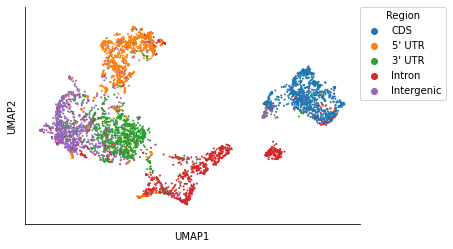

In [404]:

g = sns.scatterplot(
    data=segmentation_subset,
    x="UMAP1",
    y="UMAP2",
    hue="Region",
    hue_order=region_order,
    s=4,
    linewidth=0,
)
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.);
sns.despine()
plt.xticks([], [])
plt.yticks([], [])
g.get_legend().set_title("Region")
plt.axis('equal');
plt.savefig("umap_embedding.svg", bbox_inches="tight");

### Few-shot classification

In [386]:
#features = latent
#features = kmer_features
features = embedding_subset

In [397]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split

seeds = np.arange(5)
n_trains = [10, 50, 100]

X = features
y = segmentation_subset.Region

clf = Pipeline([
    ("scaler", StandardScaler()),
    ("regression", LogisticRegressionCV(max_iter=10000, verbose=1, random_state=42, cv=10, Cs=100))
])

cms = []
rows = []

for seed in seeds:
    print(seed)
    for n_train in n_trains:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n_train*len(y.unique()), random_state=seed, stratify=y)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred, normalize='true')
        cms.append(cm)
        for region, accuracy in zip(np.unique(y), cm.diagonal()):
            rows.append([seed, n_train, region, accuracy])

0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   23.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   46.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   22.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   37.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   21.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   40.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


3


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   23.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   34.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


4


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   21.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   37.8s finished


In [401]:
results = pd.DataFrame(rows, columns=["seed", "n_train_examples_per_region", "Region", "Accuracy"])
results

,seed,n_train_examples_per_region,Region,Accuracy
0,0,10,3' UTR,0.732323
1,0,10,5' UTR,0.843434
2,0,10,CDS,0.956566
3,0,10,Intergenic,0.732323
4,0,10,Intron,0.624242
...,...,...,...,...
70,4,100,3' UTR,0.783333
71,4,100,5' UTR,0.904444
72,4,100,CDS,0.970000
73,4,100,Intergenic,0.777778


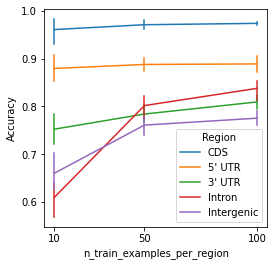

In [405]:
plt.figure(figsize=(4, 4))
sns.lineplot(
    data=results,
    x="n_train_examples_per_region",
    y="Accuracy",
    hue="Region",
    hue_order=region_order,
    err_style="bars",
)
plt.xticks(n_trains)
plt.savefig("accuracy.svg", bbox_inches="tight");

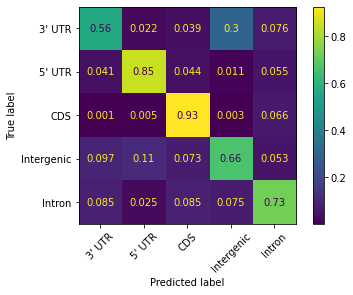

In [369]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')

plt.xticks(rotation=45);

In [373]:
#np.unique(y_test)

array(["3' UTR", "5' UTR", 'CDS', 'Intergenic', 'Intron'], dtype=object)

In [370]:
#cm = confusion_matrix(y_test, y_pred, normalize='true')
#cm

array([[0.563, 0.022, 0.039, 0.3  , 0.076],
       [0.041, 0.849, 0.044, 0.011, 0.055],
       [0.001, 0.005, 0.925, 0.003, 0.066],
       [0.097, 0.114, 0.073, 0.663, 0.053],
       [0.085, 0.025, 0.085, 0.075, 0.73 ]])

In [371]:
#cm.diagonal()

array([0.563, 0.849, 0.925, 0.663, 0.73 ])

In [308]:
#scores = cross_val_score(clf, X, y, cv=10)
#scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [276]:
# source: https://github.com/MindAI/kmer

class kmer_featurization:

  def __init__(self, k):
    """
    seqs: a list of DNA sequences
    k: the "k" in k-mer
    """
    self.k = k
    self.letters = ['A', 'T', 'C', 'G']
    self.multiplyBy = 4 ** np.arange(k-1, -1, -1) # the multiplying number for each digit position in the k-number system
    self.n = 4**k # number of possible k-mers

  def obtain_kmer_feature_for_a_list_of_sequences(self, seqs, write_number_of_occurrences=False):
    """
    Given a list of m DNA sequences, return a 2-d array with shape (m, 4**k) for the 1-hot representation of the kmer features.
    Args:
      write_number_of_occurrences:
        a boolean. If False, then in the 1-hot representation, the percentage of the occurrence of a kmer will be recorded; otherwise the number of occurrences will be recorded. Default False.    
    """
    kmer_features = []
    for seq in seqs:
      this_kmer_feature = self.obtain_kmer_feature_for_one_sequence(seq.upper(), write_number_of_occurrences=write_number_of_occurrences)
      kmer_features.append(this_kmer_feature)

    kmer_features = np.array(kmer_features)

    return kmer_features

  def obtain_kmer_feature_for_one_sequence(self, seq, write_number_of_occurrences=False):
    """
    Given a DNA sequence, return the 1-hot representation of its kmer feature.
    Args:
      seq: 
        a string, a DNA sequence
      write_number_of_occurrences:
        a boolean. If False, then in the 1-hot representation, the percentage of the occurrence of a kmer will be recorded; otherwise the number of occurrences will be recorded. Default False.
    """
    number_of_kmers = len(seq) - self.k + 1

    kmer_feature = np.zeros(self.n)

    for i in range(number_of_kmers):
      this_kmer = seq[i:(i+self.k)]
      this_numbering = self.kmer_numbering_for_one_kmer(this_kmer)
      kmer_feature[this_numbering] += 1

    if not write_number_of_occurrences:
      kmer_feature = kmer_feature / number_of_kmers

    return kmer_feature

  def kmer_numbering_for_one_kmer(self, kmer):
    """
    Given a k-mer, return its numbering (the 0-based position in 1-hot representation)
    """
    digits = []
    for letter in kmer:
      digits.append(self.letters.index(letter))

    digits = np.array(digits)

    numbering = (digits * self.multiplyBy).sum()

    return numbering